# Vehicle CO2 Emission Analysis and Prediction Part-1
### Introduction
The content of this project is similar to my previous job, which requires me to find the relationships between vehicle information (or other environmental parameters) and the gas emissions. The models of Classification and Clustering are very powerful and useful tools for environmental data analysis. 
In this project:
 * From the components of a vehicle, estimate the CO2 Emissions with K-NearestNeighbor(KNN) method, other than detecting the fuel_combustion information (which directly contributes to CO2 Emissions), it would help customers to choose environmental-friendly vehicles quickly.
 * Analysis the relationship between fuel_combustion data and CO2 Emission, build regression model for prediction.
 * Optimize the prediction of CO2 Emissions by comparison and the application of Random Forest model and XGBoost model.

# Vehicle data Analysis

* download the data set at the following link:

* [**Dataset Download Link**](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv)

See below for a detailed description of the dataset:

- **MODELYEAR	:** Year of the vehicle model
- **MAKE:** 
- **MODEL:** 
- **VEHICLECLASS:** 
- **ENGINESIZE:** 
- **CYLINDERS:** 
- **TRANSMISSION:** 
- **FUELTYPE:** 
- **FUELCONSUMPTION_CITY:** 
- **FUELCONSUMPTION_HWY:**
- **FUELCONSUMPTION_COMB:**
- **FUELCONSUMPTION_COMB_MPG:**    
- **CO2EMISSIONS:**
    
**The primary goal is to understand what factors are best at predicting whether the features of vehicle related to its CO2 emission, and offer suggestions to operationalize those insights to help with the environmental problems


# Abstract : 

This notebook is dedicated to the solution of Uber take home challenge. This challenge consists of three main questions and several sub-questions. Here is a list:

1 - **Conduct an exploratory analysis of the data to give us qualitative and quantitative insights.** 
    
2 - **Build a statistical model to predict whether a driver that signed up will begin driving for Uber.**
    - How did the model perform? Are there any caveats? How can Uber use your model to improve our product? 
    
3 - **Build a model to forecast the number of new drivers we expect to start every week.**
    - How would you validate a model like this? What other information would you use if you had access to all of Uber's data?    
    
    
My purpose in this study is to keep everything in line with the business question we like to answer. For example, EDA is performed to bring insights that are related to our business questions (task2 and task3). Therefore, I merged the EDA question to the next two questions. Here is a summary of our findings for each task. If you like to read the details of each step, please keep reading.


## Abstract -  Task 1: 
**Conduct an exploratory analysis of the data to give us qualitative and quantitative insights.** 
    - Does all the data make sense? Did you have to throw anything away? Are there interesting patterns that emerge?

- The data was very clean. I noticed only one outlier in the ``vehicle_year`` column.
- A new column, named ``target``, is generated based on the ``first_completed_date``. The value of the target is 1 when the date is availble and 0 otherwise. This was used as our dependant (target) variable we want to explain in the first task.
- The target variable was very well distributed throughout the 30 days of observation and I concluded that a random train-holdout split is sufficient.
- There are 54681 observations and 11 features in the data set and large portion of the data is missing. 
- 11.22% of the registrators become Uber driver. Therefore, there is an excellent margin of growth for the product if right insights are found.
- Customers are from 3 cities, use 5 type of operating systems, and come from 3 signup chanels. Moreover, there are 46 vehicle make that signed up. Toyota is the most popular vehicle make and Honda-Civic is the most popular vehicle model.
- Registration time is limited to the month of January 2016. However, we observed activation date is from the January 1st, 2016 through March 26th, 2016. Two more date time features are also provided:
time of background check consent, and the time when vehicle information was uploaded.
- There is about 48.4 of duplicate observations. Since there are small number of features, it is not easy to make an assumption for the origin of duplicates. Specially, when for large number of rows, several variables are (equally) missing. However, it is interesting to know that for non-duplicate columns, the ratio of becoming an Uber driver increases from 11.22% to 21.75% percent. This information is later used for developing new features.
- Although large portion of data is missing, we noticed that there is a rich amount of information in those missing values. For example, for observations with missing operative system data, the ratio of becoming Uber driver is 0.02 which is almost 1/6 of the whole data. 
- Almost 40% of background checkced column is missing. There is a vast welath of information in this column, however. Poeple who didn't consent the bacground check have 0.007 probablity of becoming an  UBER driver. This is 16 times smaller than the average of the population. **Uber might need to ease the background check process by providing more ways of providing information. Moreover, it might help to tell the customers about how their data will be dealt with. Finally, UBER might be able to provide different level of background check for different services so that more people can become a driver with a peace of mind.**
- Almost 75% of the vehicle_added_date column is missing. When the data is not missing, 44% of the customers become Uber driver. **Uber might be able to send follow up emails to the registrators and ask them to upload their information. Customer might commit more to the program by uploading their information. Moreover, streamlining the process might make it easier for the users to become Uber driver.**
- People using mac os have highest probablity of becomign Uber driver. The reason might be due to the possiblity of mac users being a part of a population that would like to stay up to date with the new technologies. Moreover, in general the phone users (android web, ios web) seem to be less prone to becoming UBER drivers. **UBER might need to improve the quality of their phone websites to make the experience more appealing for those users**.
- I noticed that the newer cars have higher probablity of becoming an Uber driver. The median is around 2013. **This might be due to the vehicle age requirements for drivers that are joining Uber. Uber might suggest that if the age of the car is above a certain threshould, the driver must provide additional information, barometer, car fax info, a certification of vehicle quality to prove that the vehicle is in good shape. Recall more than only 50 percent of the cars that registered are more than 3 years old.**
- Going forward, although graphically speaking, the city name doesn't affect the target variable (becoming Uber driver), we see that this feature is stitistically significant in seperating the classes.

** Conclusion**:

Model performed acceptable in predicting the very skewed classification problem. It reached area under AUC curve equal to 97%. There were however, some assumptions in the process that needs to be confirmed. For example, we assumed that all the missing values are data not provided/available by the user. Therefore, we assumed that no missing value occured due to any other data pipelining complications. **Moreover, the population of study, customers who registered in January, are not generalizable to all the users who register in Uber service. The main reason is that January is especial month as it is in the middle of winter and also right after holidays and usually people have quite different behaviour during this period of time.**

Finally, although model is designed for a particular time of the year, there seems to be some insights that Uber can use to improve its service. **First, as mentioned before, the background check can be revisited. Several levels of background for different services assure that different group of users are engaged and satisfied. Similarly, vehicle age can be revisited. For example, different services can ask for different age. This assures that users with older vehicles are also engaged in this service. Finally, we noticed that the first couple of days after registration is critical in defining whether a registered user would become a driver. Therefore, incentive, discounts, and other follow up actions can be focused on these days.**

Here is a summary of the results:

| Model | Hypertuned? | Area Under Curve |
| --- | --- | --- |
| Logistic Regression | No | 0.97 |
| Support Vector Machine | Yes | 0.96 |
| K-Nearest Neighbor | Yes | 0.96 |
| Random Forest | Yes | 0.97 |
| Gradient Boosted Trees| Yes | 0.95 |

## 1-1- Required Packages:

- pandas for data manipulation,

- matplotlib, Seaborn for data visualization,

- scipy for statistical Analysis

- sikit-learn for statistical modelling

- numpy for array manipulation

- datetime for time series analysis

- xgboost to perfom modelling using gradient boosted trees

In [1]:
# import libraries
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # inline plots with seaborn style
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import timedelta
from xgboost import XGBClassifier
import xgboost as xgb

## 1-2- Choice of metrics:
A very important question we need to answer at the beginning is, what do we call a good model? For classification, there are several [metrics](https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/) we can use, namely accuracy, F-1 Score and Area Under Curve, accuracy. Before knowing which one to use, we need to take a cook look at data and see how classes are distributed?

So let's import the data:

In [2]:
# In practice, researchers often collect environmental data by their own, and the data belong to whom applu the fundings (academy or company)
# Here I use an online course source of vehicle CO2 emission data as the example of analysis:
url ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
file = wget.download(url)

100% [..............................................................................] 72629 / 72629

In [5]:
# check the data intergrity and validation (see if it includes errors, or unformated values, etc.)
df = pd.read_csv(file)
df.index.name = 'id'
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
id,,,,,,,,,,,,,
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# check how many distinct items in each category
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- MODELYEAR ---
2014    1067
Name: MODELYEAR, dtype: int64
---- MAKE ---
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
TOYOTA           49
GMC              49
AUDI             49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64
---- MODEL ---
F150 FFV                     8
F150 FFV 4X4                 8
BEETLE                       6
ACCORD     

In [10]:
# exame if there is any missing data
print(df.info())
print("---- %s ---")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB
None
---- %s ---
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                

* 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION' and 'FUELTYPE' are categorical data, while the others are numeric data.

In [12]:
# also check for the duplicates
number_of_duplicates = df.duplicated().sum()
number_of_rows = df.shape[0]
print("{}% of the observations are duplicates.".format(round(number_of_duplicates/number_of_rows*100,1)))

0.0% of the observations are duplicates.


## 1-3- Choice of Train/Holdout Split

We need to see, not only, how our technique work on the data we have available, but also how can it be generalized to the real world situation. This is best done by testing the model on a holdout dataset. The relationship between the hold-out set( data we keep intact untill the last moment), and the train data, should mimic the relationship between the whole data and real-world situation we will eventually be tested on.

We have two options for train test split, (1) time-wise split, (2) random split.

We need to take a look at the target variable to see how it changes over indexes, and make sure that our hold-out set is a random part of the data.
Let's see how target changes over time:

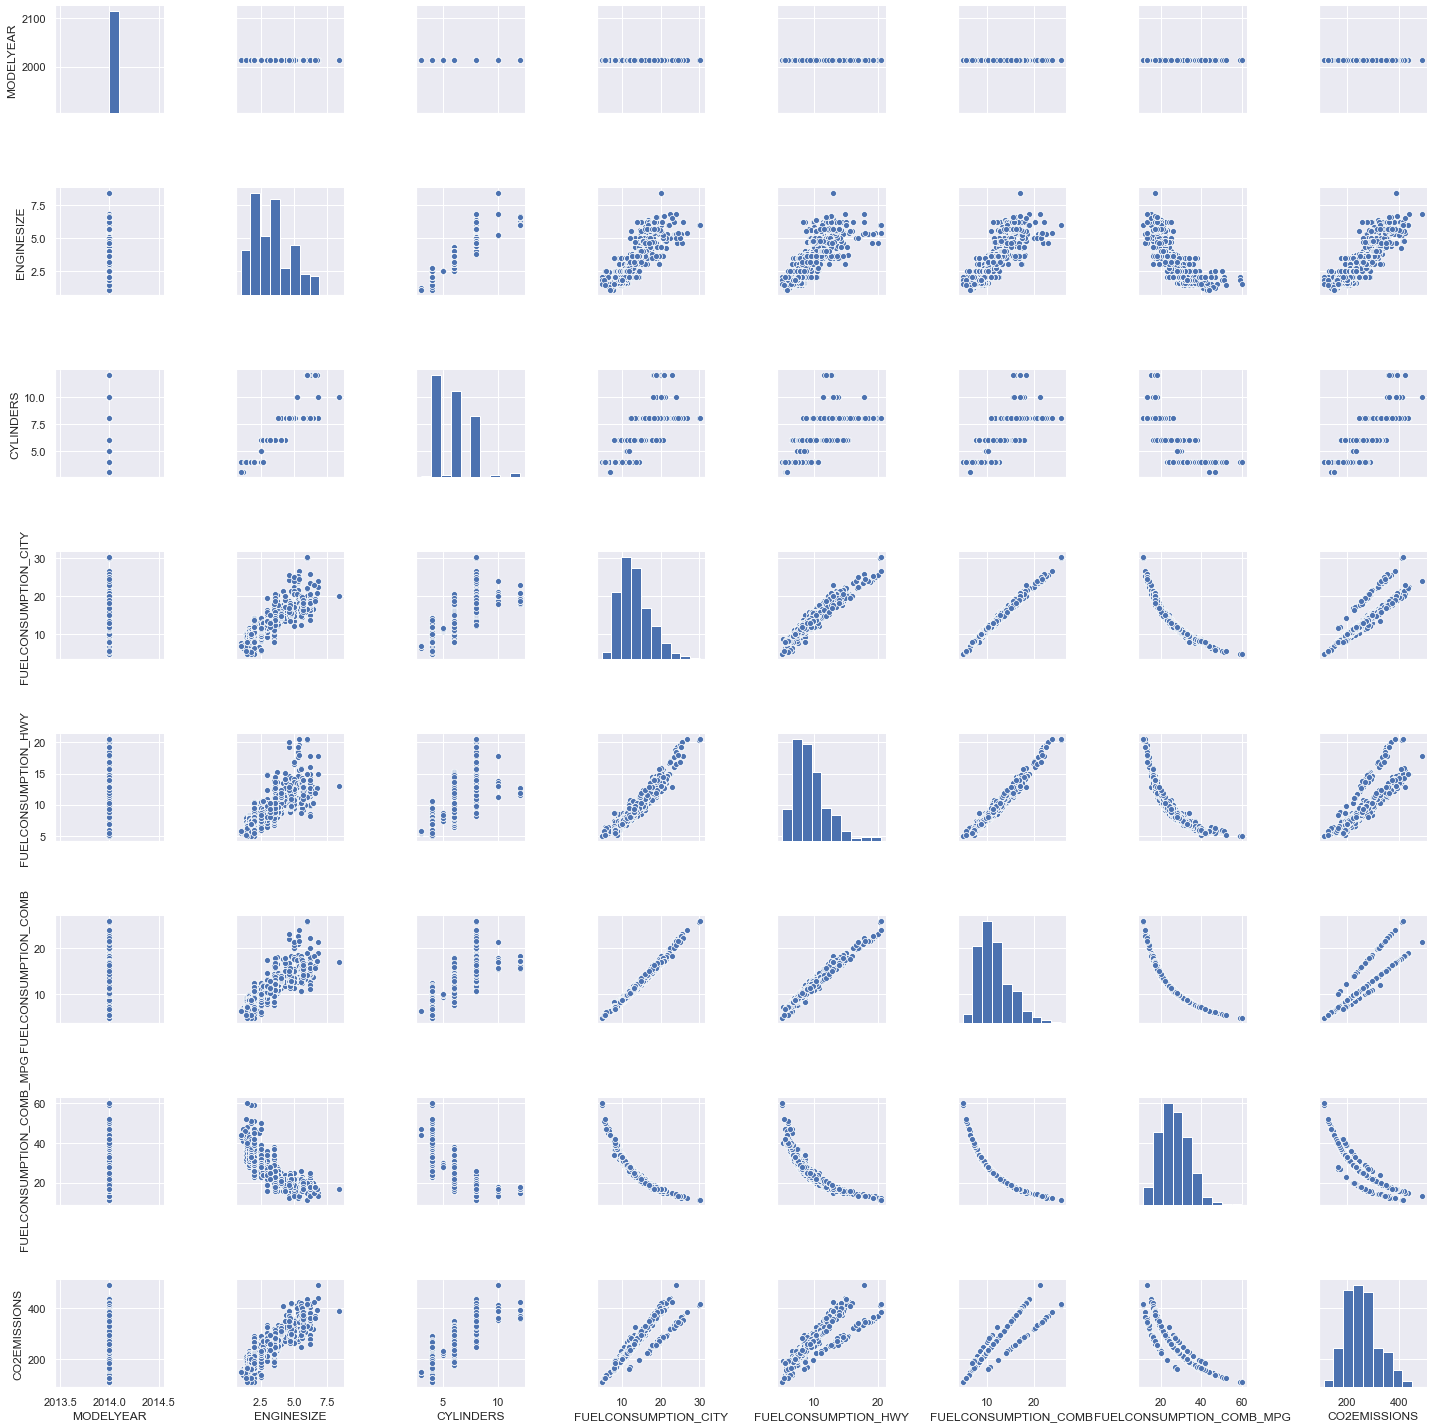

In [11]:
# take a first look at the possible relationships between each feature
sns.pairplot(df)

### A first impression of each feature:
* All modelyear are 2014.
* trends in each row have very similar regress curves, except for the FUELCONSUMPTION_COMBO_MPG column.
* The EngineSize and Cylinders both seemed to closely relate to CO2 Emission, the higher their values, the more CO2 emissions.
* Cylinders vs. CO2 emission have a trend correlates to the sizes of Cylinder, but it doesn't look like linear relation but more like a classification. The reason why this trends is obviouse may be due to the clear order of Cylinder size.
* It means that the other attributes could have likely trends if their categories in a well-order.
* The Engine Size vs. CO2 emission plot is seemly a linear relation.

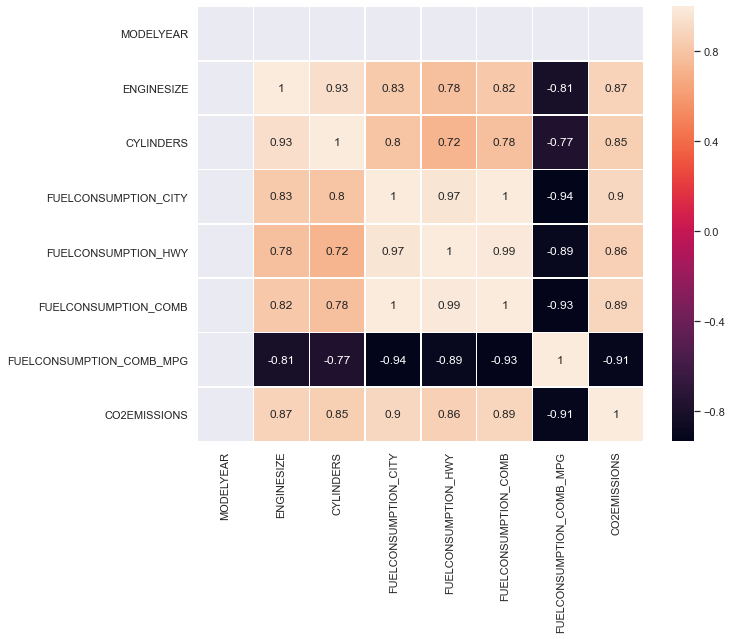

In [23]:
# Use correMatrix to find the relativity of these data
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corrMatrix, annot=True,linewidths=.5,annot_kws={"size": 12})

* FUELCONSUMPTION_COMB_MPG has negative relationships with other features and the target: CO2EMISSIONS

In [6]:
# The analysis begin with fitting data of the engine size vs. CO2 emissions with linear regression model and check the accuracy
engine_data = df[['ENGINESIZE','CO2EMISSIONS']]

# The Equation of Linear Regression is as Y = KX + be
# Generally this model emphasizes on finding the K(coefficients) and b(intercept)
from sklearn import linear_model

# First of all, split the big dataset, because Machine learning model should have some data for training (normally 80%) 
# and the rest(20%) for test the model
model = np.random.rand(len(engine_data)) <= 0.8
engine_train = engine_data[model]
engine_test = engine_data[~model]

engine_reg = linear_model.LinearRegression()
engine_train_x = np.asanyarray(engine_train[['ENGINESIZE']])
engine_train_y = np.asanyarray(engine_train[['CO2EMISSIONS']])
engine_reg.fit(engine_train_x, engine_train_y)

# Calculate the coefficients,finding K and b 
print ('Coefficients: ', engine_reg.coef_)
print ('Intercept: ',engine_reg.intercept_)

Coefficients:  [[39.58826069]]
Intercept:  [123.88669868]


In [7]:
# Now use the test set for examing the R2-score (the value which shows how good it fits your training data)
from sklearn.metrics import r2_score

engine_test_x = np.asanyarray(engine_test[['ENGINESIZE']])
engine_test_y = np.asanyarray(engine_test[['CO2EMISSIONS']])
engine_test_y_hat = engine_reg.predict(engine_test_x)

# Mean absolute error(MAE) tells the range of an error that can be expected on average
print("Mean absolute error(MAE): %.2f" % np.mean(np.absolute(engine_test_y_hat - engine_test_y)))

# Mean square error(MSE) corresponding to the expected value of the squared error loss
print("Mean square error(MSE): %.2f" % np.mean((engine_test_y_hat - engine_test_y) ** 2))

# R2 score is the value shows how good it fits the training data, the closer R to 1, the better.
print("R2-score: %.2f" % r2_score(engine_test_y_hat , engine_test_y) )

Mean absolute error(MAE): 24.80
Mean square error(MSE): 1090.99
R2-score: 0.69


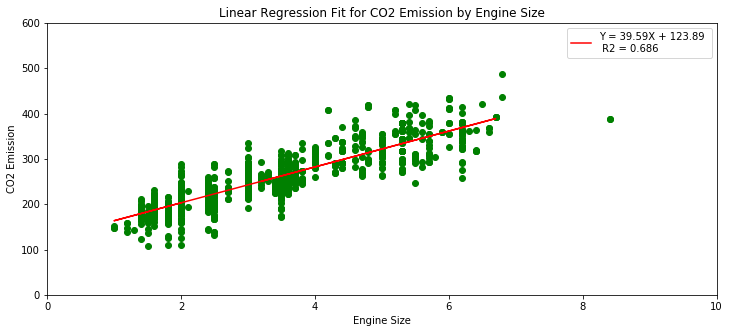

In [8]:
# plot the linear regression line
plt.figure(figsize = (12,5))
plt.scatter(engine_data.ENGINESIZE, engine_data.CO2EMISSIONS, color='Green')
plt.title('Linear Regression Fit for CO2 Emission by Engine Size')
plt.xlim(0,10)
plt.ylim(0,600)
plt.plot(engine_train_x, engine_reg.coef_[0]*engine_train_x + engine_reg.intercept_[0], '-r', 
         label = 'Y = {}X + {} \n R2 = {}'.format(engine_reg.coef_[0][0].round(2),
                                                  engine_reg.intercept_[0].round(2),
                                                  r2_score(engine_test_y_hat , engine_test_y).round(3)))
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.legend(loc = 'best')

###  Linear regression identifies the equation that produces the smallest difference between all of the observed values and their fitted values
* R2 = (Exlained variance by the model/Total Variance), the more its value close to 1, the model is better fitting.
* The linear regression interpret this correlation as CO2 Emission = Engine Size * 39.33 + 125.05
* The K and b could be changed very slightly because we choose the train sets and test sets randomly
* An ideal linear regression model should have a R2 value >= 0.99, however in reality, the outcomes always involved with many factors
* R2 = 0.74 is a considerable linear regression accuracy in practice
* So the engine size may hahve a positive linear relation with CO2 emissions (increase and decrease in the same time.)

## 3. K-NearestNeighbor (K-NN) model for classification

K-NN is a non-parametric (non numeric) method used for classification and regression. K is a constant that defines the length of similar features, so as to classificate features into new categories: 
* In K-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In K-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

### 3.1 Encode the data
Encoding is the process of converting text or boolean values to numerical values for processing.

In [9]:
# Import K-NN tool
from sklearn import preprocessing

# Separate the features and the measurement
# 'MAKE' is the brand of the vehicle, this attribute is very unrelated, it is not needed to include
x1 = df[['VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE']]
y1 = df[['CO2EMISSIONS']]

# Get data from the dataframe for training and testing
KNN_1 = x1.copy().values

In [10]:
# Use preprocessing.LabelEncoder() to transform the string values into numeric values
# Set this function to each attribute for the numeric values could invert_transform back to string values
vehicle = preprocessing.LabelEncoder()
vehicle_fit = vehicle.fit(x1['VEHICLECLASS'].unique())
KNN_1[:,0] = vehicle_fit.transform(KNN_1[:,0])

engine = preprocessing.LabelEncoder()
engine_fit = engine.fit(x1['ENGINESIZE'].unique())
KNN_1[:,1] = engine_fit.transform(KNN_1[:,1])

cylinder = preprocessing.LabelEncoder()
cylinder_fit = cylinder.fit(x1['CYLINDERS'].unique())
KNN_1[:,2] = cylinder_fit.transform(KNN_1[:,2])

transmission = preprocessing.LabelEncoder()
transmission_fit = transmission.fit(x1['TRANSMISSION'].unique())
KNN_1[:,3] = transmission_fit.transform(KNN_1[:,3])

fueltype = preprocessing.LabelEncoder()
fuel_fit = fueltype.fit(x1['FUELTYPE'].unique())
KNN_1[:,4] = fuel_fit.transform(KNN_1[:,4])

#### The 'preprocessing' will convert the string values into numeric values,  the values could be call back

In [11]:
def callback():
    callback_table = pd.DataFrame(columns=['VEHICLECLASS','VEHICLECLASS_NUM',
                                           'ENGINESIZE','ENGINESIZE_NUM',
                                           'CYLINDERS','CYLINDERS_NUM',
                                           'TRANSMISSION','TRANSMISSION_NUM',
                                           'FUELTYPE','FUELTYPE_NUM'])
    
    callback_table['VEHICLECLASS'] = vehicle_fit.inverse_transform(KNN_1[:,0].astype(int))
    callback_table['VEHICLECLASS_NUM'] = KNN_1[:,0]
    
    
    callback_table['ENGINESIZE'] = engine_fit.inverse_transform(KNN_1[:,1].astype(int))
    callback_table['ENGINESIZE_NUM'] = KNN_1[:,1]
    
    callback_table['CYLINDERS'] = cylinder_fit.inverse_transform(KNN_1[:,2].astype(int))
    callback_table['CYLINDERS_NUM'] = KNN_1[:,2]
    
    callback_table['TRANSMISSION'] = transmission_fit.inverse_transform(KNN_1[:,3].astype(int))
    callback_table['TRANSMISSION_NUM'] = KNN_1[:,3]
    
    callback_table['FUELTYPE'] = fuel_fit.inverse_transform(KNN_1[:,4].astype(int))
    callback_table['FUELTYPE_NUM'] = KNN_1[:,4]
    
    return callback_table

In [12]:
# Prepare the y values (CO2 Emissions), use .copy() to keep previous preprocessing values for future track back
KNN_x = KNN_1.copy()
KNN_y = np.concatenate(y1.copy().values)

In [13]:
# in practical,CO2 emissions often set into classes(Serious levels) to decrease inaccuracy
# and CO2 emissions are numeric values which have too many numbers to encode with, so I manually encode it with the levels
# here I use bins to ranges of CO2 emissions, the more balanced could increase the accuracy for KNN
df.CO2EMISSIONS.value_counts(bins = 8)

(250.5, 298.0]      299
(203.0, 250.5]      282
(155.5, 203.0]      224
(298.0, 345.5]      127
(345.5, 393.0]       85
(393.0, 440.5]       26
(107.619, 155.5]     23
(440.5, 488.0]        1
Name: CO2EMISSIONS, dtype: int64

In [14]:
# Set a series of thresholds(levels) for CO2 Emission
for i in range(len(KNN_y)):
    if KNN_y[i] <= 203:
        KNN_y[i] = 0
    elif KNN_y[i] > 203 and KNN_y[i] <= 250:
        KNN_y[i] = 1
    elif KNN_y[i] > 250 and KNN_y[i] <= 298:
        KNN_y[i] = 2
    else:
        KNN_y[i] = 3
        
# Now the CO2 Emission are group by:
# Level 0 : 0-203
# Level 1 : 203-250
# Level 2 : 250-298
# Level 3 : >298

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(KNN_x, KNN_y, test_size=0.2, random_state=4)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Begin with 4 at first, best k will be determined later.
k = 4
#Train Model and Predict  
KNN_class = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_hat = KNN_class.predict(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_class.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set: (853, 5) (853,)
Test set: (214, 5) (214,)
Train set Accuracy:  0.8018757327080891
Test set Accuracy:  0.7009345794392523


* The Accuracy is not bad, but another K may be better

### 3.2 Finding the best K value
One of most important steps for K-NN model is finding the best K value (best accuracy)

In [17]:
# the best K value is the one returns best accuracy (close to 1), try to find it for the modelling
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks): 
    KNN_test = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    test_hat=KNN_test.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, test_hat)
    std_acc[n-1]=np.std(test_hat==y_test)/np.sqrt(test_hat.shape[0])

print('accuracy_mean: \n', mean_acc[0:20])
print('accuracy_std: \n', std_acc[0:20])

accuracy_mean: 
 [0.69158879 0.69626168 0.76168224 0.70093458 0.73831776 0.74766355
 0.76168224 0.75700935 0.72897196 0.71495327 0.71495327 0.71495327
 0.72429907 0.71495327 0.70093458 0.68224299 0.70560748 0.70093458
 0.70093458 0.68691589]
accuracy_std: 
 [0.03157055 0.03143614 0.02912448 0.03129788 0.03004705 0.02969178
 0.02912448 0.02931828 0.03038475 0.03085958 0.03085958 0.03085958
 0.03054718 0.03085958 0.03129788 0.03182806 0.03115574 0.03129788
 0.03129788 0.03170118]


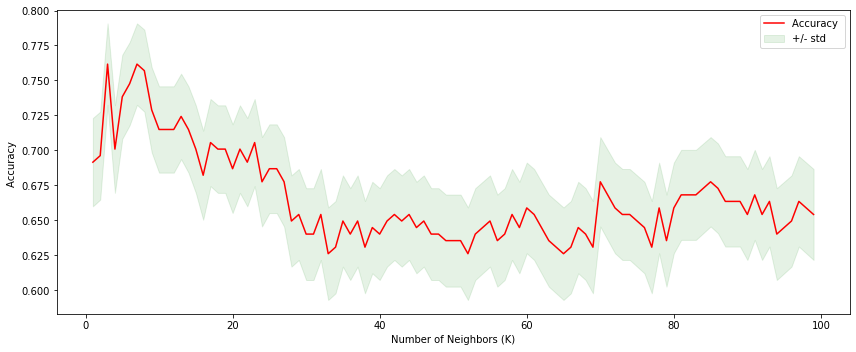

The best accuracy was with 0.7617 with k = 3


In [18]:
plt.figure(figsize = (12,5))
plt.plot(range(1,Ks),mean_acc,'red')
plt.fill_between(range(1,Ks),(mean_acc - 1 * std_acc), (mean_acc + 1 * std_acc),  color = 'green', alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max().round(4), "with k =", mean_acc.argmax()+1) 

* The special case where the class is predicted to be the class of the closest training sample (i.e. when k = 1) is called the nearest neighbor algorithm.
* Right here the best k is 3

In [19]:
k = 3
#Train Model and Predict  

KNN_class = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_hat = KNN_class.predict(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_class.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print("R2-score: %.2f" % r2_score(y_hat, y_test) )

Train set: (853, 5) (853,)
Test set: (214, 5) (214,)
Train set Accuracy:  0.8499413833528722
Test set Accuracy:  0.7616822429906542
R2-score: 0.71


In [20]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(5, random_state = 1)
np.sqrt((-1) * cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean())

C:\Users\Xiang Fu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.5960366749808745

In [21]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
#Train Model and Predict  
KNN_regress = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)

y_regress_hat = KNN_regress.predict(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

print("R2-score: %.2f" % r2_score(y_regress_hat, y_test) )

Train set: (853, 5) (853,)
Test set: (214, 5) (214,)
R2-score: 0.76


### 3.4 Test the model

In [22]:
# find the category's number for each attribute, randomly select the samples
a = callback().sample(n=3)
b = a.index
a

,VEHICLECLASS,VEHICLECLASS_NUM,ENGINESIZE,ENGINESIZE_NUM,CYLINDERS,CYLINDERS_NUM,TRANSMISSION,TRANSMISSION_NUM,FUELTYPE,FUELTYPE_NUM
991,SUV - SMALL,11,2.5,10,4,1,AS6,11,X,2
356,SUV - SMALL,11,1.6,5,4,1,AS6,11,X,2
468,SUV - SMALL,11,3.6,17,6,3,A6,2,E,1


In [23]:
# get the value of CO2 Emission from original table
print(df['CO2EMISSIONS'][b[0]])
print(df['CO2EMISSIONS'][b[1]])
print(df['CO2EMISSIONS'][b[2]])

216
209
272


In [28]:
# put the correlate numbers into prediction function:
# because the samples are randomly selected, each time the values will be different, please check
print('Prediction 1:', KNN_class.predict([[11,10,1,11,2]])) 
print('Prediction 2:', KNN_class.predict([[11,5,1,11,2]]))
print('Prediction 3:', KNN_class.predict([[11,17,3,2,1]]))

Prediction 1: [1]
Prediction 2: [1]
Prediction 3: [2]


#### As categoried above, CO2 Emissions are in levels as:
* Level 0 : 0-203
* Level 1 : 203-250
* Level 2 : 250-298
* Level 3 : >298

Our Predicted values are in correct level, so this model works

### 3.5 Visualization of classification

In [29]:
X_fig = pd.DataFrame(X_test)
X_fig.columns = ['VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE']

Text(0, 0.5, 'Engine Size')

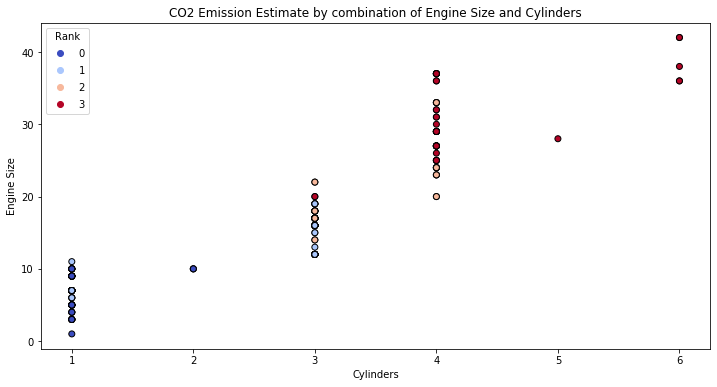

In [30]:
plt.figure(figsize = (12,6))
fig1 = plt.scatter(X_fig['CYLINDERS'],X_fig['ENGINESIZE'], c = y_hat, cmap = 'coolwarm', alpha = 1,edgecolor='k')
lengend1 = plt.legend(*fig1.legend_elements(),title = "Rank",loc='upper left')
title1 = plt.title('CO2 Emission Estimate by combination of Engine Size and Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Engine Size')

* Even though this simple figure contains only two attributes, it still indicates how will be the CO2 emissions under different combinations of these attributes.
* because the data have been trained and classified, few attributes have more information than before.

Text(0, 0.5, 'Transmission')

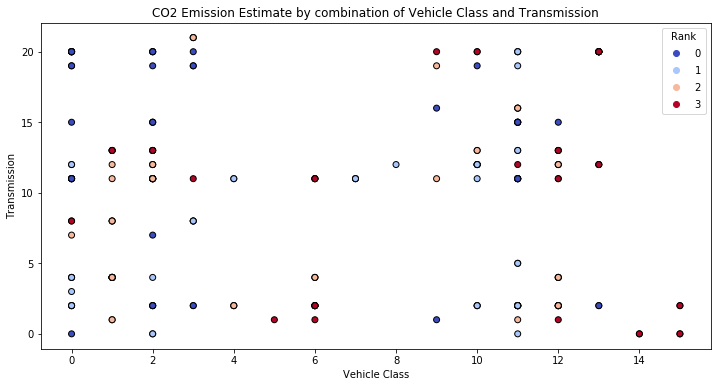

In [31]:
# try another combination
plt.figure(figsize = (12,6))
fig2 = plt.scatter(X_fig['VEHICLECLASS'],X_fig['TRANSMISSION'], c = y_hat, cmap = 'coolwarm',alpha = 1,edgecolor='k')
legend1 = plt.legend(*fig2.legend_elements(),title = "Rank",loc='best')
title1 = plt.title('CO2 Emission Estimate by combination of Vehicle Class and Transmission')
plt.xlabel('Vehicle Class')
plt.ylabel('Transmission')

* Most of the time, even few attributes contain huge differences, and K-NN helps to quickly narrow down the range.

### 3.6 Summary
* The K-NN method returns a well classified outcome that reveal a well correlation between 5 attributes of vehicle and CO2 Emissions.
* After K-NN modelling, every data is labeled and classified, the combination of attributes will leave to a certain category of CO2 Emission level. 
* The K-NN method works well with non-numeric attributes, with the normalization (convert to numeric categories), the K-NN method returns accurate prediction.
* And classificate y values into several levels (categories) is very helpful on increase the accuracy for K-NN.


## 4. Fitting with other models

### 4.1 Comparison among some popular models

In [80]:
x2 = KNN_x.copy()
y2 = KNN_y.copy()
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=6)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns = x1.columns)
X_train_scaled.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE
0,-0.836760,-0.611880,-1.143051,0.791121,-0.426208
1,-1.230447,2.609933,2.604153,-0.847168,1.005113
2,-1.033604,0.092892,0.355831,-1.293974,-0.426208
3,1.328523,-0.913925,-1.143051,1.535798,1.005113
4,0.737992,0.898345,1.105272,0.195379,1.005113


In [82]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
Model = []
RMSE = []
R_2 = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error').mean()))
    R_2.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

C:\Users\Xiang Fu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)

In [84]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_2})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.527107,0.757808
1,Ridge Regression,0.527087,0.757833
2,Lasso Regression,1.077911,-0.006362
3,K Neighbors Regressor,0.509664,0.773777
4,Decision Tree Regressor,0.486786,0.798906
5,Random Forest Regressor,0.427238,0.842494
6,Gradient Boosting Regressor,0.431081,0.837541
7,Adaboost Regressor,0.509184,0.782342


### Summary
* This comparison suggests that the 'Random Forest Regressor' and 'Gradient Boosting Regressor' could be two optimized models (with lower RMSE and higher R-Squared).
* Then it's worth to try applying this two models for this data.

### 4.2 Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

In [97]:
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}' 
      .format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7944


In [98]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=x1.columns).sort_values(ascending=False)

feature_scores

ENGINESIZE      0.392181
VEHICLECLASS    0.208757
TRANSMISSION    0.169846
CYLINDERS       0.161706
FUELTYPE        0.067509
dtype: float64

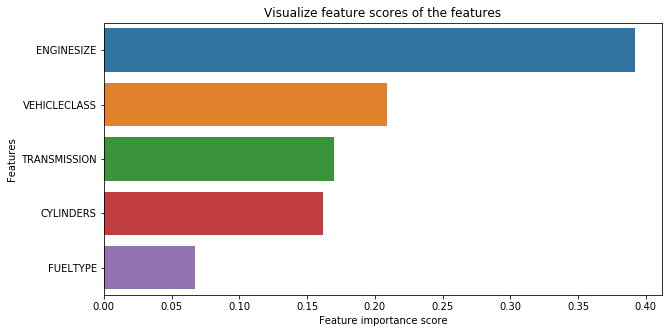

In [88]:
# the most important feature is ENGINESIZE and least important feature is FUELTYPE.
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[45  9  0  0]
 [13 38  7  0]
 [ 1  8 47  2]
 [ 0  0  4 40]]


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        54
           1       0.69      0.66      0.67        58
           2       0.81      0.81      0.81        58
           3       0.95      0.91      0.93        44

    accuracy                           0.79       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.80      0.79      0.79       214



### Conclusion 1
1. The Random Forest model does have higher accuracy (0.79) than KNN model (0.71).
2. The Fueltype is the weakest attribute for this model.

### 4.3 Gradient Boost Regressor

In [91]:
import xgboost as xgb
from xgboost import XGBClassifier

params = {'objective':'binary:logistic','max_depth': 4,
            'alpha': 10,'learning_rate': 1.0, 'n_estimators':100}         
                  
xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

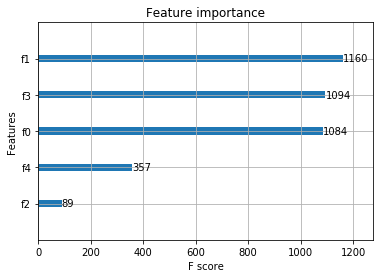

<Figure size 1152x864 with 0 Axes>

In [93]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (6, 4))
plt.show()

In [99]:
# The last two attributes (TRANSMISSION and FUELTYPE) have least importance, it different.
# Compare the accuracy of XGBoost
y_pred = xgb_clf.predict(X_test)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.7991


### Conclusion 2
1. The XGBoost does have higher accuracy (0.799) than KNN model (0.71).

2. XGBoost modle can check the importance of each attribute(feature) in the original dataset.

3. The method of XGBoost is based on counting the number of times on each feature that has been splited onto all boosting trees in the model. And the attributes are ordered by according to how many times they appear on the tree.
